# COVID-19 in the United States

Illustrating the growth of COVID-19 cases in the United States, using data
aggregated by the New York Times (https://github.com/nytimes/covid-19-data)

In [1]:
# Import libraries
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import matplotlib.pyplot as plt

import datetime

In [2]:
# Analysis hyperparameters
state = 'California'

In [3]:
# Load in data
states_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
# Change date strings to datetime objects
states_df.date = pd.to_datetime(states_df.date, format='%Y-%m-%d')
states_df.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


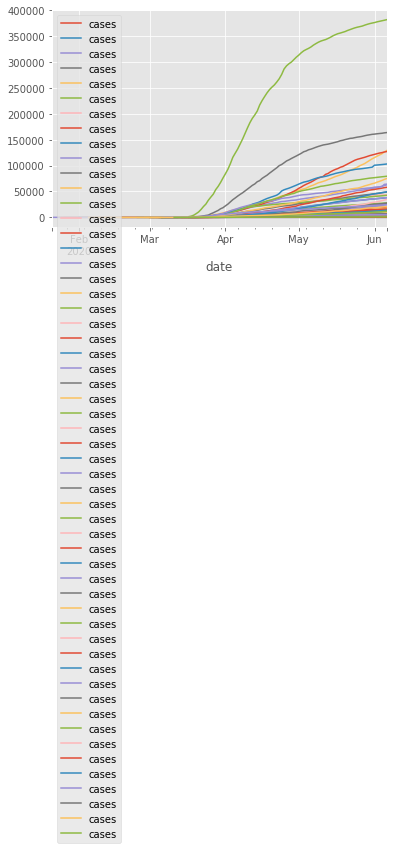

In [4]:
groupby_states = states_df.groupby('state')

with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    groupby_states.plot.line(x='date', y='cases', ax=ax)

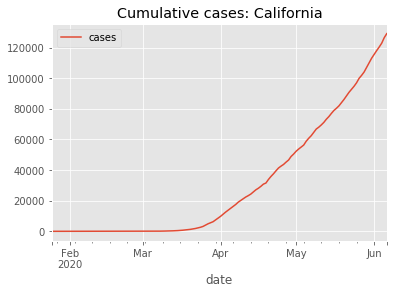

In [5]:
# Plot cumulative cases
state_df = states_df[states_df.state == state]
with plt.style.context('ggplot'):
    state_df.plot.line(x='date', y='cases')
    plt.title('Cumulative cases: {}'.format(state))

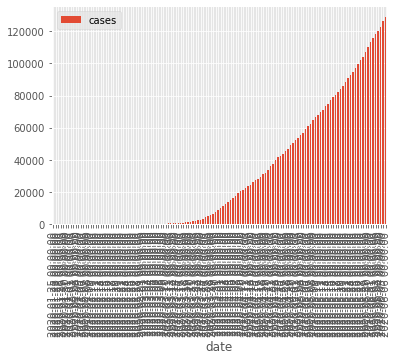

In [6]:
# TODO: Plot daily-increase cases
state_df = states_df[states_df.state == state]
with plt.style.context('ggplot'):
    # recent_state_df = state_df[datetime.datetime(2020, 4, 1) <= state_df.date]
    # recent_state_df.plot.bar(x='date', y='cases')
    state_df.plot.bar(x='date', y='cases')
    # plt.xticks(ticks=[datetime.datetime(2020, 4, 1), datetime.datetime(2020, 5, 15)])

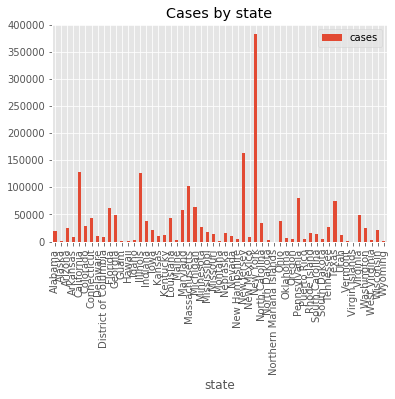

In [7]:
# Grab data from the most recent date.
recent_state_df = groupby_states.apply(lambda row: row.loc[row.date.idxmax()])

with plt.style.context('ggplot'):
    recent_state_df.plot.bar(y='cases')
    plt.title('Cases by state')

## Plot overlay on map

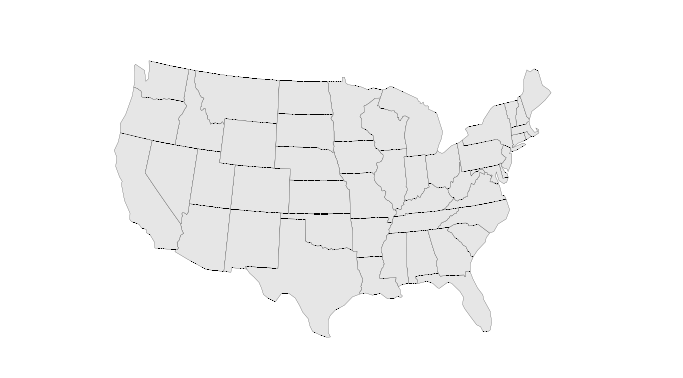

In [8]:
# Based on example: https://residentmario.github.io/geoplot/gallery/plot_usa_city_elevations.html
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

proj = gplt.crs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})
# now... change facecolor plots differ b
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9),
                   'linewidth': 0.2}

gplt.polyplot(contiguous_usa.geometry, ax=ax, **polyplot_kwargs)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


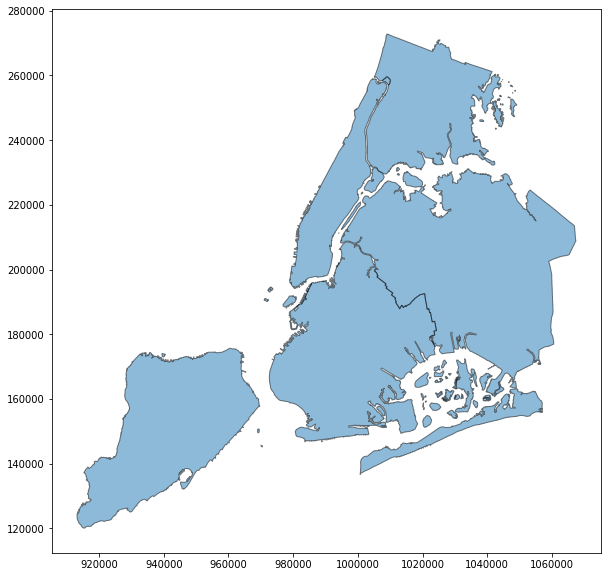

In [9]:
# Try out GeoPandas
df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df.head()

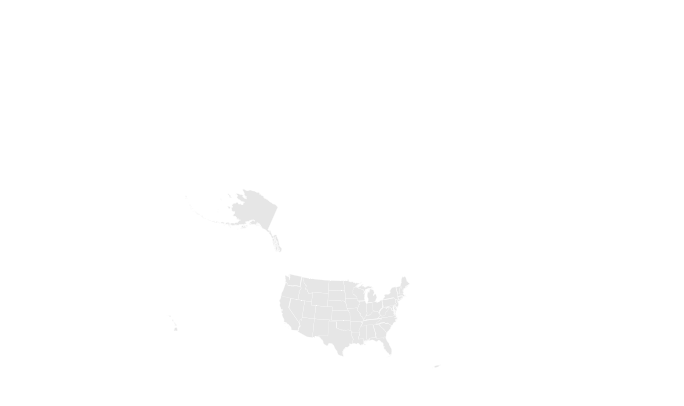

In [25]:
# contiguous_usa
# gplt.datasets.available
# gplt.datasets.get_path('contiguous_usa')
usa = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json')
# Change some of the column names to match above
usa.rename(columns={'NAME' : 'state'}, inplace=True)
usa.set_index('state', inplace=True)
usa

proj = gplt.crs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})
# now... change facecolor plots differ b
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9),
                   'linewidth': 0.2}

gplt.polyplot(usa,
              edgecolor='white',
              ax=ax, **polyplot_kwargs)

In [40]:
# Get ready to merge datasets
# Merge datasets
merged_df = usa.merge(recent_state_df, left_index=True, right_index=True, how='outer')
merged_df.head()

,GEO_ID,STATE,LSAD,CENSUSAREA,geometry,date,state,fips,cases,deaths
state,,,,,,,,,,
Alabama,0400000US01,01,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",2020-06-06,Alabama,1,20043,689
Alaska,0400000US02,02,,570640.950,"MULTIPOLYGON (((-162.25503 54.97835, -162.2496...",2020-06-06,Alaska,2,579,8
Arizona,0400000US04,04,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",2020-06-06,Arizona,4,25517,1046
Arkansas,0400000US05,05,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",2020-06-06,Arkansas,5,9101,154
California,0400000US06,06,,155779.220,"MULTIPOLYGON (((-120.24848 33.99933, -120.2473...",2020-06-06,California,6,129147,4626


In [43]:
mask = merged_df.index.isin(contiguous_usa.state)
mask

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [64]:
# In theory, all dates should be the same.
# Report the most common date as most-recent data
date = merged_df.date.max()
str(date.date())

'2020-06-06'

<Figure size 864x576 with 0 Axes>

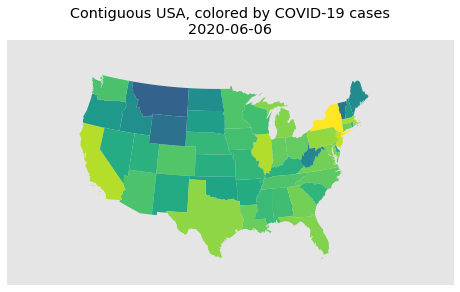

In [86]:
import matplotlib.colors as colors

with plt.style.context('ggplot'):
    plt.figure(figsize=(12,8))
    gplt.choropleth(
        merged_df[mask], hue='cases', # scheme=scheme,
        projection=proj,
        cmap='viridis',
        # legend=True, # This causes a type error: unclear why
        norm=colors.LogNorm(vmin=merged_df.cases.min(), vmax=merged_df.cases.max())
    )
    plt.title('Contiguous USA, colored by COVID-19 cases\n' +
              str(date.date()))